In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from ctgan import CTGAN


In [2]:
application = pd.read_csv("./data/application_record.csv")
credit = pd.read_csv("./data/credit_record.csv")

In [3]:
application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
#checking number of entities in each label
application.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [6]:
#checking number of unique entries in each label
application.nunique() 

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64

In [7]:
credit.nunique()

ID                45985
MONTHS_BALANCE       61
STATUS                8
dtype: int64

<Axes: >

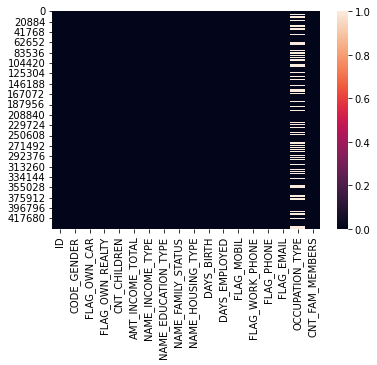

In [8]:
#plotting null values
sns.heatmap(application.isnull()) 

<Axes: >

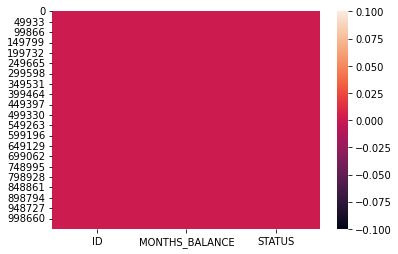

In [9]:
sns.heatmap(credit.isnull()) 

In [10]:
#dropping non_unique values from dataframe
application = application.drop_duplicates("ID",keep="last") 

In [11]:
application.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438510 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438510 non-null  int64  
 1   CODE_GENDER          438510 non-null  object 
 2   FLAG_OWN_CAR         438510 non-null  object 
 3   FLAG_OWN_REALTY      438510 non-null  object 
 4   CNT_CHILDREN         438510 non-null  int64  
 5   AMT_INCOME_TOTAL     438510 non-null  float64
 6   NAME_INCOME_TYPE     438510 non-null  object 
 7   NAME_EDUCATION_TYPE  438510 non-null  object 
 8   NAME_FAMILY_STATUS   438510 non-null  object 
 9   NAME_HOUSING_TYPE    438510 non-null  object 
 10  DAYS_BIRTH           438510 non-null  int64  
 11  DAYS_EMPLOYED        438510 non-null  int64  
 12  FLAG_MOBIL           438510 non-null  int64  
 13  FLAG_WORK_PHONE      438510 non-null  int64  
 14  FLAG_PHONE           438510 non-null  int64  
 15  FLAG_EMAIL           4

In [12]:
#drop null values 
application.drop("OCCUPATION_TYPE", axis = 1, inplace = True) 

In [13]:
application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0


In [14]:
#checking for all non-numerical data columns and saving them 
obj = pd.DataFrame(application.dtypes =='object').reset_index()
object_type = obj[obj[0] == True]['index']
object_type

1            CODE_GENDER
2           FLAG_OWN_CAR
3        FLAG_OWN_REALTY
6       NAME_INCOME_TYPE
7    NAME_EDUCATION_TYPE
8     NAME_FAMILY_STATUS
9      NAME_HOUSING_TYPE
Name: index, dtype: object

In [15]:
application[object_type]

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE
0,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment
1,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment
2,M,Y,Y,Working,Secondary / secondary special,Married,House / apartment
3,F,N,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment
4,F,N,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment
...,...,...,...,...,...,...,...
438552,M,N,Y,Pensioner,Secondary / secondary special,Separated,House / apartment
438553,F,N,N,Working,Secondary / secondary special,Single / not married,House / apartment
438554,F,N,N,Commercial associate,Higher education,Single / not married,With parents
438555,F,N,Y,Pensioner,Secondary / secondary special,Married,House / apartment


In [16]:
application[object_type]['CODE_GENDER']

0         M
1         M
2         M
3         F
4         F
         ..
438552    M
438553    F
438554    F
438555    F
438556    F
Name: CODE_GENDER, Length: 438510, dtype: object

In [17]:
#creating separate list for numerical data
num_type = pd.DataFrame(application.dtypes !='object').reset_index().rename(columns = {0: 'y/n'})
num_type = num_type[num_type['y/n'] == True]['index']

In [18]:
#converting all non-numerical data values into numerical data values
#where values from 0,1,2,3,4,... are classes.

encoder = LabelEncoder()
for i in application:
    if application[i].dtypes == 'object':
        application[i] = encoder.fit_transform(application[i])
        
print(application.head())

        ID  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804            1             1                1             0   
1  5008805            1             1                1             0   
2  5008806            1             1                1             0   
3  5008808            0             0                1             0   
4  5008809            0             0                1             0   

   AMT_INCOME_TOTAL  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0          427500.0                 4                    1   
1          427500.0                 4                    1   
2          112500.0                 4                    4   
3          270000.0                 0                    4   
4          270000.0                 0                    4   

   NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                   0                  4      -12005          -4542   
1                   0                  4      -12005

In [19]:
application[num_type].head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0
1,5008805,0,427500.0,-12005,-4542,1,1,0,0,2.0
2,5008806,0,112500.0,-21474,-1134,1,0,0,0,2.0
3,5008808,0,270000.0,-19110,-3051,1,0,1,1,1.0
4,5008809,0,270000.0,-19110,-3051,1,0,1,1,1.0


<Axes: xlabel='ID', ylabel='CNT_FAM_MEMBERS'>

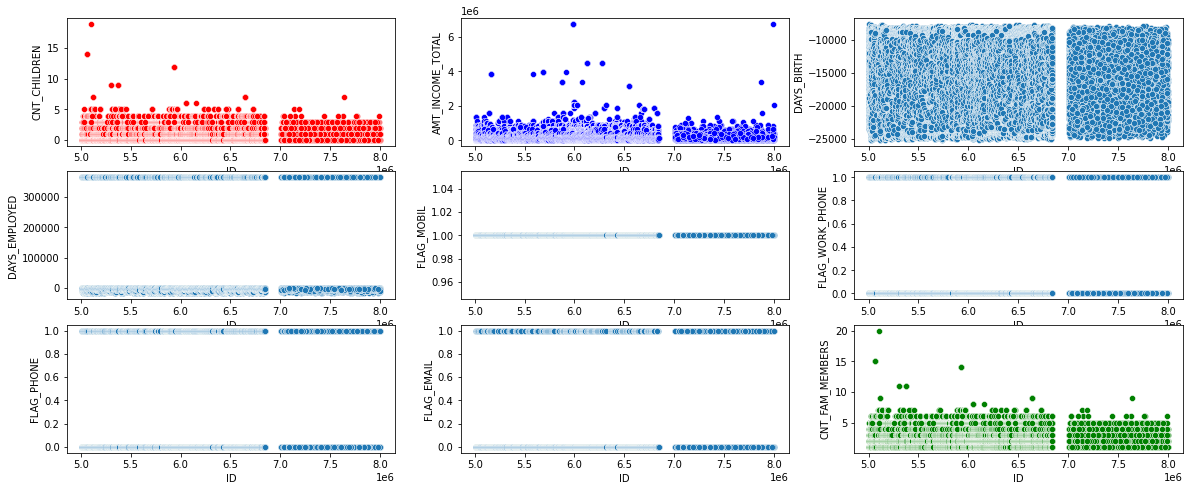

In [20]:
#Plotting numerical data values

fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (20,8))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=application, ax=ax[0][0], color= 'red')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=application, ax=ax[0][1], color='blue')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=application, ax=ax[0][2])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=application, ax=ax[1][0])
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=application, ax=ax[1][1])
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=application, ax=ax[1][2])
sns.scatterplot(x='ID', y='FLAG_PHONE', data=application, ax=ax[2][0])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=application, ax=ax[2][1])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=application, ax=ax[2][2], color= 'green')

In [21]:
#since 3 labels have outliers we eliminate those for better accuracy.

#COUNT_CHILDREN
hi_percentile = application["CNT_CHILDREN"].quantile(0.999)
low_percentile = application["CNT_CHILDREN"].quantile(0.001)
application = application[(application["CNT_CHILDREN"]>low_percentile) & (application["CNT_CHILDREN"]<hi_percentile)]

#AMT_INCOME_TOTAL
hi_percentile = application["AMT_INCOME_TOTAL"].quantile(0.999)
low_percentile = application["AMT_INCOME_TOTAL"].quantile(0.001)
application = application[(application["AMT_INCOME_TOTAL"]>low_percentile) & (application["AMT_INCOME_TOTAL"]<hi_percentile)]

#CNT_FAM_MEMBERS
hi_percentile = application["CNT_FAM_MEMBERS"].quantile(0.999)
low_percentile = application["CNT_FAM_MEMBERS"].quantile(0.001)
application = application[(application["CNT_FAM_MEMBERS"]>low_percentile) & (application["CNT_FAM_MEMBERS"]<hi_percentile)]


<Axes: xlabel='ID', ylabel='CNT_FAM_MEMBERS'>

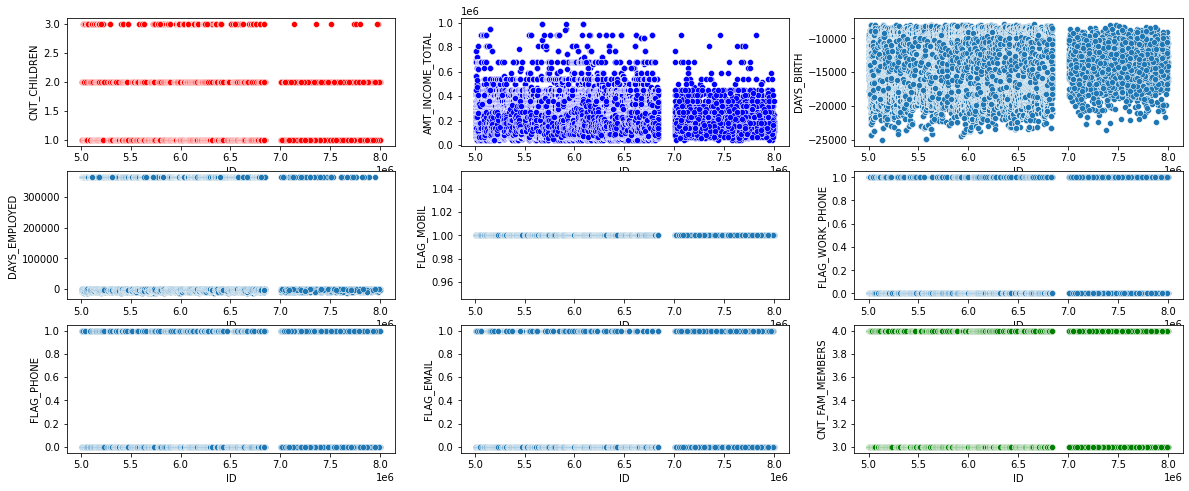

In [22]:
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (20,8))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=application, ax=ax[0][0], color= 'red')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=application, ax=ax[0][1], color='blue')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=application, ax=ax[0][2])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=application, ax=ax[1][0])
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=application, ax=ax[1][1])
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=application, ax=ax[1][2])
sns.scatterplot(x='ID', y='FLAG_PHONE', data=application, ax=ax[2][0])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=application, ax=ax[2][1])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=application, ax=ax[2][2], color= 'green')

In [23]:
credit=credit.sort_values(["ID","MONTHS_BALANCE"],ascending = [True,False])


In [24]:
credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [25]:
credit["STATUS"].value_counts()

STATUS
C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: count, dtype: int64

In [26]:
#Since there are only two types of status we merge all paid and unpaid classes.
credit["STATUS"].replace({"C": 0, "X": 0}, inplace = True)
credit["STATUS"] = credit['STATUS'].astype("int")
credit['STATUS'] = credit['STATUS'].apply(lambda x: 1 if x > 1 else 0)

In [27]:
credit['STATUS'].value_counts(normalize=True) 

STATUS
0    0.99704
1    0.00296
Name: proportion, dtype: float64

In [28]:
credit_grouped = credit.groupby('ID').agg(max).reset_index()
credit_grouped.head() 

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,0
1,5001712,0,0
2,5001713,0,0
3,5001714,0,0
4,5001715,0,0


In [29]:
data = pd.merge(application, credit_grouped, on='ID', how='inner')

In [30]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008838,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,-9,0
1,5008839,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0,0
2,5008840,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0,0
3,5008841,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0,0
4,5008842,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0,0


In [31]:
data.drop("MONTHS_BALANCE",axis = 1, inplace= True)
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
0,5008838,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
1,5008839,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
2,5008840,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
3,5008841,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
4,5008842,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0


In [32]:
data['STATUS'].value_counts(normalize=False) 

STATUS
0    9365
1     151
Name: count, dtype: int64

In [33]:
data["STATUS"].count()

9516

In [34]:
X = data.iloc[:,1:-1] #taking all rows, from second column to the last
Y = data.iloc[:,-1] # taking all rows from the last column (STATUS)
print(len(X),len(Y))

9516 9516


In [35]:
#Splitting dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25)
print(len(X_train),len(X_test),len(Y_train),len(Y_test))

7137 2379 7137 2379


In [36]:
#scaling the data
scaler = MaxAbsScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
print(len(X_scaled),len(X_test_scaled))

7137 2379


In [37]:
#Performing Smote to oversample data to balance the dataset
oversample = SMOTE()
X_balanced, Y_balanced = oversample.fit_resample(X_scaled, Y_train)
X_test_smote, Y_test_smote = oversample.fit_resample(X_test_scaled, Y_test)

print("X_scaled",len(X_scaled),"X_balanced",len(X_balanced),"Y_balanced",len(Y_balanced),"X_testbalanced",len(X_test_smote),"Y_testbalanced",len(Y_test_smote))


X_scaled 7137 X_balanced 14052 Y_balanced 14052 X_testbalanced 4678 Y_testbalanced 4678


In [38]:
print(X_scaled.columns)

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS'],
      dtype='object')


In [39]:
cat_fts = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS']

In [40]:
#converting Y series to Y dataframe
y_tr = Y_train.to_frame()
y_test = Y_test.to_frame()
y_cat = ['STATUS']

In [41]:
#Performing generation of synthetic data by CTGAN to balance the dataset
ctgan = CTGAN()

ctgan.fit(X_scaled,cat_fts,epochs = 100) #4 mins for 10 epochs #X_data

# Generate the same number of samples as the difference between minority class and majority
# Combine synthetic data and original data

Xtrainsamples = ctgan.sample(6917)
X_combined = pd.concat([X_scaled, Xtrainsamples], axis=0)


In [42]:
ctganY = CTGAN()
ctganY.fit(y_tr,y_cat,epochs = 100)
Ytrainsamples = ctganY.sample(6917)
Y_combined = pd.concat([Y_train, Ytrainsamples])

In [43]:
ctgan1 = CTGAN()
ctgan1.fit(X_test_scaled,cat_fts,epochs = 100)

# Generate the same number of samples as the difference between minority class and majority
# Combine synthetic data and original data

X_test_synthetic = ctgan.sample(2297)
X_test_combined = pd.concat([X_test_scaled, X_test_synthetic], axis=0)

In [44]:
ctgan2 = CTGAN()
ctgan2.fit(y_test,y_cat,epochs = 100)
Y_test_synthetic = ctgan2.sample(2297)
Y_test_combined = pd.concat([Y_test, Y_test_synthetic])

In [45]:
print("X_scaled",len(X_scaled),"X_combined",len(X_combined),"Y_combined",len(Y_combined),"X_testcombined",len(X_test_combined),"Y_testcombined",len(Y_test_combined))

X_scaled 7137 X_combined 14054 Y_combined 14054 X_testcombined 4676 Y_testcombined 4676


In [46]:
#converting Y dataframe into Y series for evaluating
Y_total = Y_combined['STATUS']
Y_test_series = Y_test_combined['STATUS']
type(Y_total)
print(type(Y_test_series))

<class 'pandas.core.series.Series'>


In [47]:
Y_total = Y_total.fillna(0)
Y_test_series = Y_test_series.fillna(0)

In [48]:
Models = [
    ("Logistic Regression", LogisticRegression()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Support Vector Machine", SVC()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier())
]


In [49]:

#X,Y_balanced for smote train X,Y_test_smote for smote test

model_names = []
train_accs = []
test_accs = []


for name, model in Models:
    model.fit(X_balanced, Y_balanced)
    tr_acc = model.score(X_balanced, Y_balanced)
    t_acc = model.score(X_test_smote, Y_test_smote)
    
    model_names.append(name)
    train_accs.append(tr_acc)
    test_accs.append(t_acc)

# Print the results
for i in range(len(model_names)):
    print(f"Model: {model_names[i]}, Train Accuracy: {train_accs[i]}, Test Accuracy: {test_accs[i]}")


Model: Logistic Regression, Train Accuracy: 0.6587674352405352, Test Accuracy: 0.5551517742625054
Model: K-Nearest Neighbors, Train Accuracy: 0.9854113293481355, Test Accuracy: 0.7772552372808893
Model: Support Vector Machine, Train Accuracy: 0.9030742954739539, Test Accuracy: 0.7778965369816161
Model: Decision Tree, Train Accuracy: 0.9948761742100769, Test Accuracy: 0.8672509619495511
Model: Random Forest, Train Accuracy: 0.9948761742100769, Test Accuracy: 0.8800769559640872


In [53]:

#X_combined,Y_total for ctgan train X_test_combined,Y_test_series for ctgan test

model_names = []
train_accs = []
test_accs = []


for name, model in Models:
    model.fit(X_combined, Y_total)
    tr_acc = model.score(X_combined, Y_total)
    t_acc = model.score(X_test_combined, Y_test_series)
    
    model_names.append(name)
    train_accs.append(tr_acc)
    test_accs.append(t_acc)

# Print the results
for i in range(len(model_names)):
    print(f"Model: {model_names[i]}, Train Accuracy: {train_accs[i]}, Test Accuracy: {test_accs[i]}")

Model: Logistic Regression, Train Accuracy: 0.9758075992599972, Test Accuracy: 0.9535928143712575
Model: K-Nearest Neighbors, Train Accuracy: 0.9760210616194678, Test Accuracy: 0.9535928143712575
Model: Support Vector Machine, Train Accuracy: 0.9758075992599972, Test Accuracy: 0.9535928143712575
Model: Decision Tree, Train Accuracy: 1.0, Test Accuracy: 0.9322070145423439
Model: Random Forest, Train Accuracy: 1.0, Test Accuracy: 0.9535928143712575
